### Key Components

#### Data Inputs:

- ** The model uses specific input conditions related to sandblasting, acid etching, and anodizing processes to predict the quality metrics of the implant surface.

**Sandblasting Conditions:**
- **Angle of Sandblasting (degrees) (`angle_sandblasting`)**: 
  - The angle at which sandblasting is performed on the implant surface.
  - This angle influences the texture and roughness of the implant surface.

- **Pressure of Sandblasting (bar) (`pressure_sandblasting_bar`)**: 
  - The pressure applied during the sandblasting process.
  - Higher pressures typically result in more aggressive surface modifications.

**Acid Etching Conditions:**
- **Temperature of Acid Etching (°C) (`temperature_acid_etching`)**: 
  - The temperature at which acid etching is conducted to create micro-textures on the implant surface.
  - Temperature affects the depth and uniformity of the etching.

- **Time of Acid Etching (minutes) (`time_acid_etching_min`)**: 
  - The duration for which acid etching is performed.
  - Longer etching times can increase surface roughness but may also affect other properties like cell viability.

**Anodizing Conditions:**
- **Voltage of Anodizing (V) (`voltage_anodizing_v`)**: 
  - The voltage used during anodizing to form a protective oxide layer on the implant surface.
  - The voltage influences the thickness and structure of the oxide layer.

- **Time of Anodizing (minutes) (`time_anodizing_min`)**: 
  - The duration of the anodizing process.
  - Time influences the formation and quality of the oxide layer.

#### Prediction Metrics:

The model predicts two key metrics: **Surface Roughness (Sa)** and **Cell Viability (%)**, both critical for the performance and biocompatibility of implants.

**Average Surface Roughness (Sa) (`sa_surface_roughness_micrometer`)**:
- **Definition**: A critical metric for implant performance, representing the average roughness of the surface, measured in micrometers (µm).
- **Importance**: Surface roughness affects the implant’s interaction with biological tissues and its ability to integrate with bone (osseointegration).
- **Validation Range**: The predicted Sa value must fall within the range 1.5μm < Sa < 2.5μm to be considered valid.
- **Action**: If the predicted Sa falls outside this range, the "Cell Viability (%)" prediction is automatically set to 0 (indicating failure).

**Cell Viability (%) (`cell_viability_percent`)**:
- **Definition**: Represents the percentage of viable cells on the implant surface, indicating its biocompatibility.
- **Importance**: High cell viability is crucial for the successful integration of the implant into biological tissue.
- **Threshold for Validity**: Predictions are valid only if `cell_viability_percent > 90`.
- **Binary Indicator (`Result_Passed_1_Failed_0`)**:
  - **1 (Passed)**: If `cell_viability_percent > 90`, the implant is considered to have passed.
  - **0 (Failed)**: If `cell_viability_percent ≤ 90`, the implant is considered to have failed.

### Procedure for Predictions:

This section outlines the steps the model follows to predict and validate the metrics for implant surface quality.

**Predict Surface Roughness (Sa):**
1. **Input Conditions**: The sandblasting, acid etching, and anodizing conditions are input into the model.
2. **Prediction**: The model predicts the `sa_surface_roughness_micrometer` value based on the input conditions.

**Evaluate Surface Roughness (Sa):**
1. **Check Validity**: The predicted Sa value is evaluated to ensure it falls within the range 1.5μm < Sa < 2.5μm.
   - **If Valid**: The model proceeds to predict `cell_viability_percent`.
   - **If Invalid**: The model sets `cell_viability_percent` to 0, indicating failure.

**Predict Cell Viability (%):**
1. **Prediction**: If the predicted Sa value is valid, the model uses the input conditions to predict `cell_viability_percent`.

**Evaluate Cell Viability (%):**
1. **Check Validity**: The predicted `cell_viability_percent` is evaluated to ensure it exceeds 90%.
2. **Binary Indicator (`Result_Passed_1_Failed_0`)**: The result is recorded as:
   - **1 (Passed)**: If `cell_viability_percent > 90`.
   - **0 (Failed)**: If `cell_viability_percent ≤ 90`.


In [1]:
import os

# Check current working directory
print("Current working directory:", os.getcwd())


Current working directory: d:\iNeuron_Projects\End_to_End_ML_Dental_Implant_Sandblasting\research


In [2]:
os.chdir("../")

In [3]:
%pwd

'd:\\iNeuron_Projects\\End_to_End_ML_Dental_Implant_Sandblasting'

### 2. Data Loading and Exploration :

First few rows of the dataset:


,angle_sandblasting,pressure_sandblasting_bar,temperature_acid_etching,time_acid_etching_min,voltage_anodizing_v,time_anodizing_min,sa_surface_roughness_micrometer,cell_viability_percent,Result_Passed_1_Failed_0
0,30,3,25,3,80,1,0.746,75,0
1,40,3,25,3,80,1,0.813,70,0
2,50,3,25,3,80,1,0.952,65,0
3,30,3,25,6,80,1,0.950,77,0
4,30,3,25,9,80,1,1.020,75,0



Data shape: (198, 9)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   angle_sandblasting               198 non-null    int64  
 1   pressure_sandblasting_bar        198 non-null    int64  
 2   temperature_acid_etching         198 non-null    int64  
 3   time_acid_etching_min            198 non-null    int64  
 4   voltage_anodizing_v              198 non-null    int64  
 5   time_anodizing_min               198 non-null    int64  
 6   sa_surface_roughness_micrometer  198 non-null    float64
 7   cell_viability_percent           198 non-null    int64  
 8   Result_Passed_1_Failed_0         198 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 14.0 KB

Data types:
angle_sandblasting                   int64
pressure_sandblasting_bar            int64
temperature_acid_etching      

,angle_sandblasting,pressure_sandblasting_bar,temperature_acid_etching,time_acid_etching_min,voltage_anodizing_v,time_anodizing_min,sa_surface_roughness_micrometer,cell_viability_percent,Result_Passed_1_Failed_0
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,37.121212,4.050505,49.621212,5.818182,99.393939,5.176768,2.086010,77.126263,0.116162
std,8.016193,0.859391,21.738710,2.353801,16.235462,3.694428,0.760536,8.858689,0.321231
min,30.000000,3.000000,25.000000,3.000000,80.000000,1.000000,0.746000,62.000000,0.000000
25%,30.000000,3.000000,25.000000,3.000000,80.000000,1.000000,1.450000,70.000000,0.000000
50%,30.000000,4.000000,50.000000,6.000000,100.000000,5.000000,2.156000,76.000000,0.000000
75%,40.000000,5.000000,75.000000,9.000000,120.000000,10.000000,2.623500,83.000000,0.000000
max,50.000000,5.000000,75.000000,9.000000,120.000000,10.000000,3.497000,96.000000,1.000000



Missing values by column:
angle_sandblasting                 0
pressure_sandblasting_bar          0
temperature_acid_etching           0
time_acid_etching_min              0
voltage_anodizing_v                0
time_anodizing_min                 0
sa_surface_roughness_micrometer    0
cell_viability_percent             0
Result_Passed_1_Failed_0           0
dtype: int64

Data types after cleaning:
angle_sandblasting                   int64
pressure_sandblasting_bar            int64
temperature_acid_etching             int64
time_acid_etching_min                int64
voltage_anodizing_v                  int64
time_anodizing_min                   int64
sa_surface_roughness_micrometer    float64
cell_viability_percent               int64
Result_Passed_1_Failed_0             int64
dtype: object

Data after Winsorizing 'cell_viability_percent':
count    198.000000
mean      28.651515
std       38.045455
min        0.000000
25%        0.000000
50%        0.000000
75%       71.500000
max     

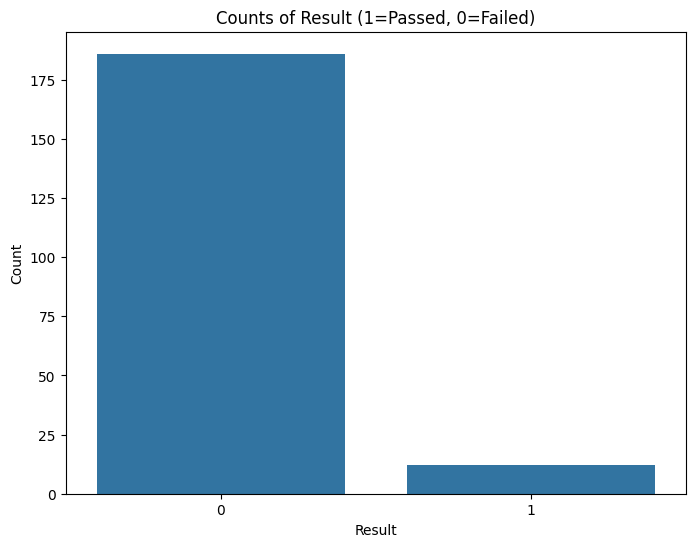

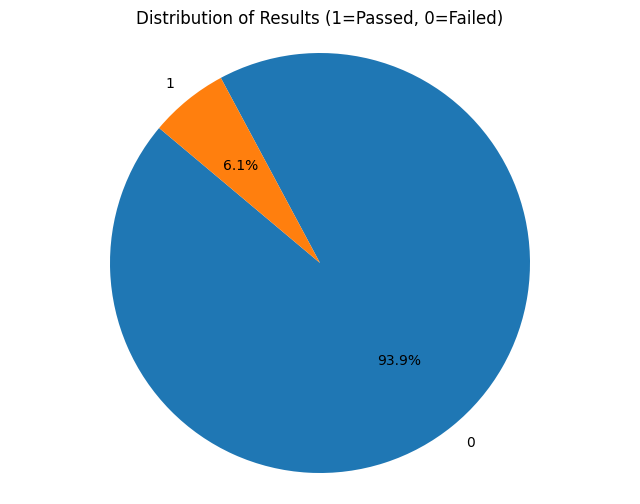

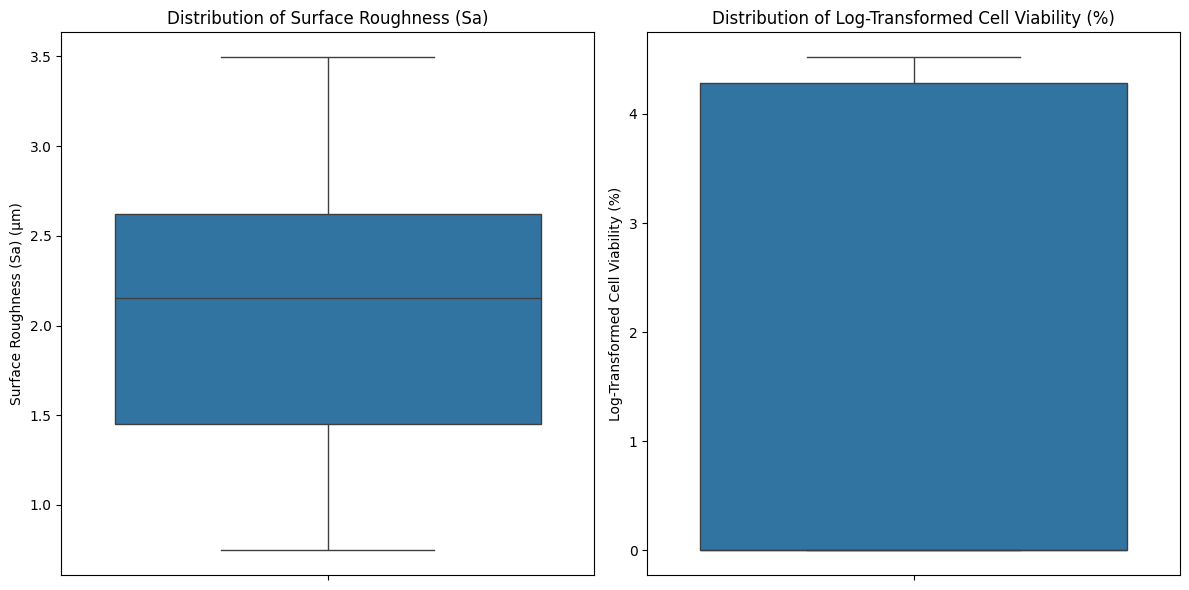

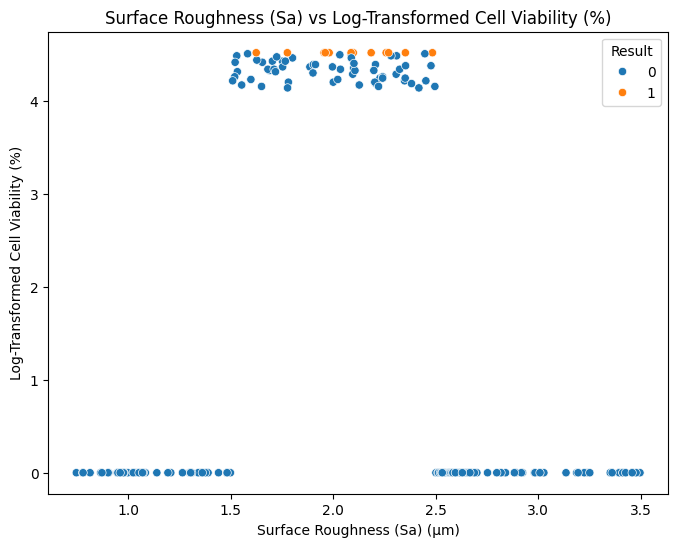

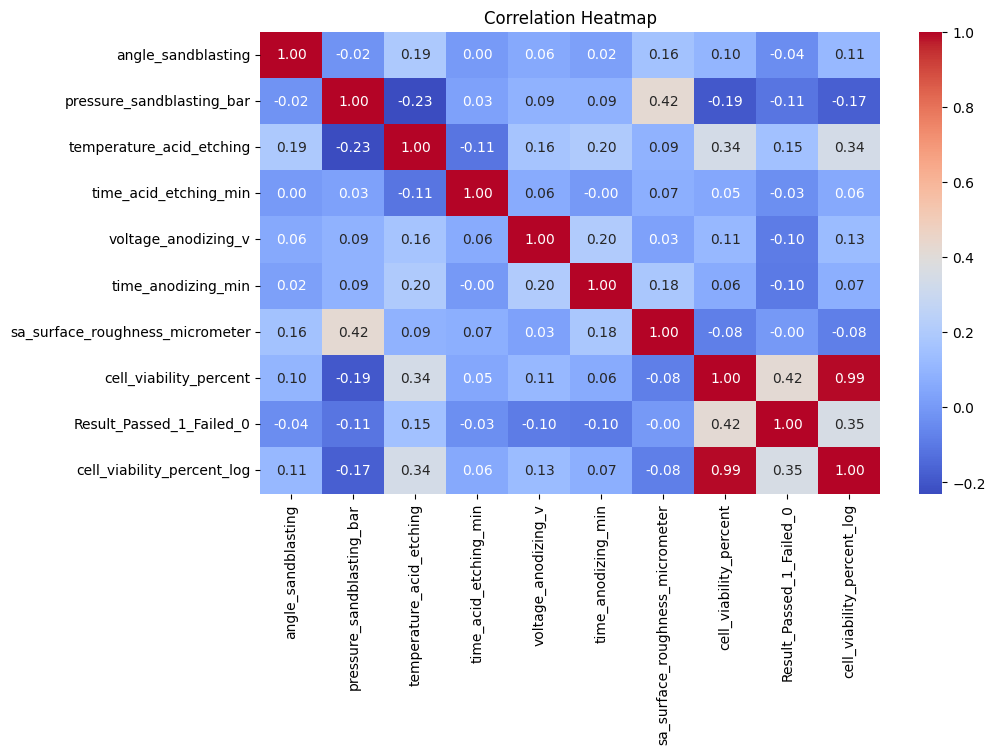

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, normaltest
from feature_engine.outliers import Winsorizer

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Display first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

# Data shape
print(f"\nData shape: {data.shape}")

# Data types and basic info
print("\nData info:")
data.info()

# Display data types of each column
print("\nData types:")
print(data.dtypes)

# Summary statistics
print("\nSummary statistics:")
display(data.describe(include='all'))

# Check for missing values
print("\nMissing values by column:")
print(data.isnull().sum())

# Handling non-numeric values
cols_to_convert = [
    'pressure_sandblasting_bar',
    'temperature_acid_etching',
    'time_acid_etching_min',
    'voltage_anodizing_v',
    'time_anodizing_min',
    'sa_surface_roughness_micrometer',
    'cell_viability_percent'
]

data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in these columns
data = data.dropna(subset=cols_to_convert)

# Confirm that non-numeric values are handled
print("\nData types after cleaning:")
print(data.dtypes)

# Filter data according to the given validation ranges
valid_data = data[(data['sa_surface_roughness_micrometer'] > 1.5) &
                  (data['sa_surface_roughness_micrometer'] < 2.5)]

# Set "Cell Viability (%)" to 0 where Sa is outside the valid range
data.loc[~data.index.isin(valid_data.index), 'cell_viability_percent'] = 0

# Set Result (1=Passed, 0=Failed) based on Cell Viability threshold
data['Result_Passed_1_Failed_0'] = np.where(data['cell_viability_percent'] > 90, 1, 0)

# Outlier handling using Winsorizing
winsorizer = Winsorizer(capping_method='quantiles', tail='both', fold=0.05, variables=['cell_viability_percent'])
data['cell_viability_percent'] = winsorizer.fit_transform(data[['cell_viability_percent']])

# Confirm Winsorizing effect
print("\nData after Winsorizing 'cell_viability_percent':")
print(data['cell_viability_percent'].describe())

# Apply Log Transformation to Cell Viability
data['cell_viability_percent_log'] = np.log1p(data['cell_viability_percent'])

# Check Normality and Skewness after Log Transformation
cell_viability_skewness_log = skew(data['cell_viability_percent_log'])
print(f"Skewness of Log-Transformed Cell Viability (%): {cell_viability_skewness_log:.2f}")

stat, p = normaltest(data['cell_viability_percent_log'])
print(f"Normality test p-value for Log-Transformed Cell Viability (%): {p:.3f}")

# Exploratory Data Analysis (EDA)

# 1. Bar Chart: Counts of Result
plt.figure(figsize=(8, 6))
sns.countplot(x='Result_Passed_1_Failed_0', data=data)
plt.title("Counts of Result (1=Passed, 0=Failed)")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

# 2. Pie Chart: Distribution of Results
result_counts = data['Result_Passed_1_Failed_0'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Results (1=Passed, 0=Failed)")
plt.axis('equal')
plt.show()

# 3. Box Plot: Distribution of Surface Roughness (Sa) and Cell Viability (%)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='sa_surface_roughness_micrometer', data=data)
plt.title("Distribution of Surface Roughness (Sa)")
plt.ylabel("Surface Roughness (Sa) (µm)")

plt.subplot(1, 2, 2)
sns.boxplot(y='cell_viability_percent_log', data=data)
plt.title("Distribution of Log-Transformed Cell Viability (%)")
plt.ylabel("Log-Transformed Cell Viability (%)")

plt.tight_layout()
plt.show()

# 4. Scatter Plot: Surface Roughness (Sa) vs Cell Viability
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sa_surface_roughness_micrometer', 
                y='cell_viability_percent_log', hue='Result_Passed_1_Failed_0', data=data)
plt.title("Surface Roughness (Sa) vs Log-Transformed Cell Viability (%)")
plt.xlabel("Surface Roughness (Sa) (µm)")
plt.ylabel("Log-Transformed Cell Viability (%)")
plt.legend(title='Result')
plt.show()

# 5. Correlation Heatmap: Focus on Sa and Cell Viability
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### 3. Data Preprocessing
- The data preprocessing stage is crucial to ensure the quality and readiness of the data for model training. This includes handling missing values, normalizing or standardizing features, and splitting the data into training and testing sets.

Missing values:
 angle_sandblasting                 0
pressure_sandblasting_bar          0
temperature_acid_etching           0
time_acid_etching_min              0
voltage_anodizing_v                0
time_anodizing_min                 0
sa_surface_roughness_micrometer    0
cell_viability_percent             0
Result_Passed_1_Failed_0           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   angle_sandblasting               198 non-null    float64
 1   pressure_sandblasting_bar        198 non-null    float64
 2   temperature_acid_etching         198 non-null    float64
 3   time_acid_etching_min            198 non-null    float64
 4   voltage_anodizing_v              198 non-null    float64
 5   time_anodizing_min               198 non-null    float64
 6   sa_surface_roughness_micrometer 

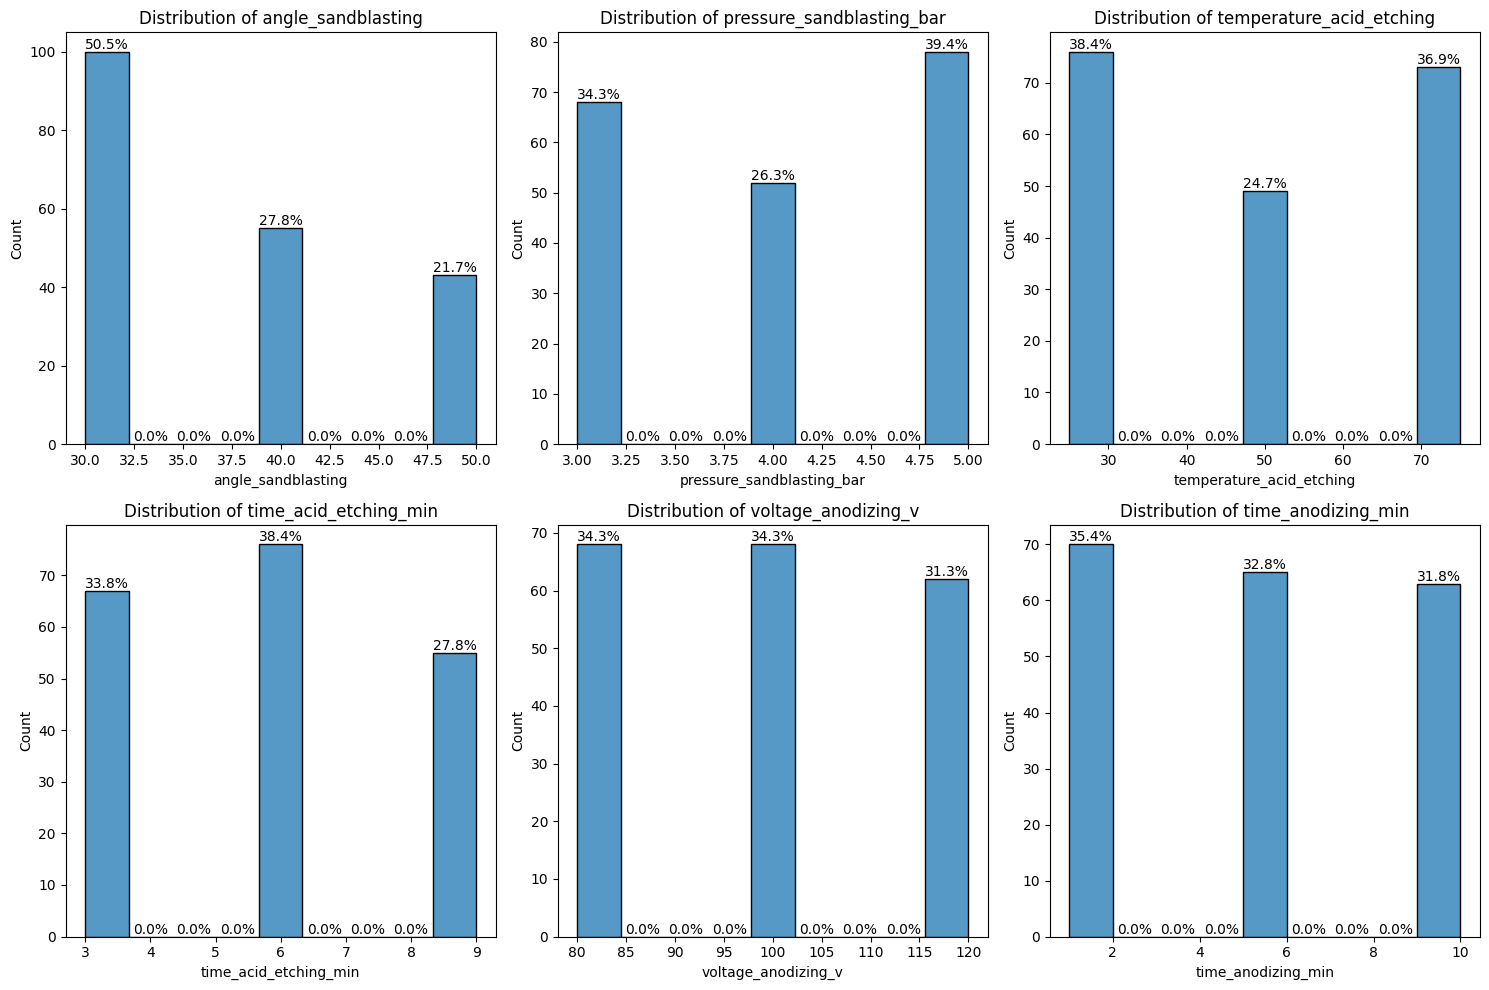

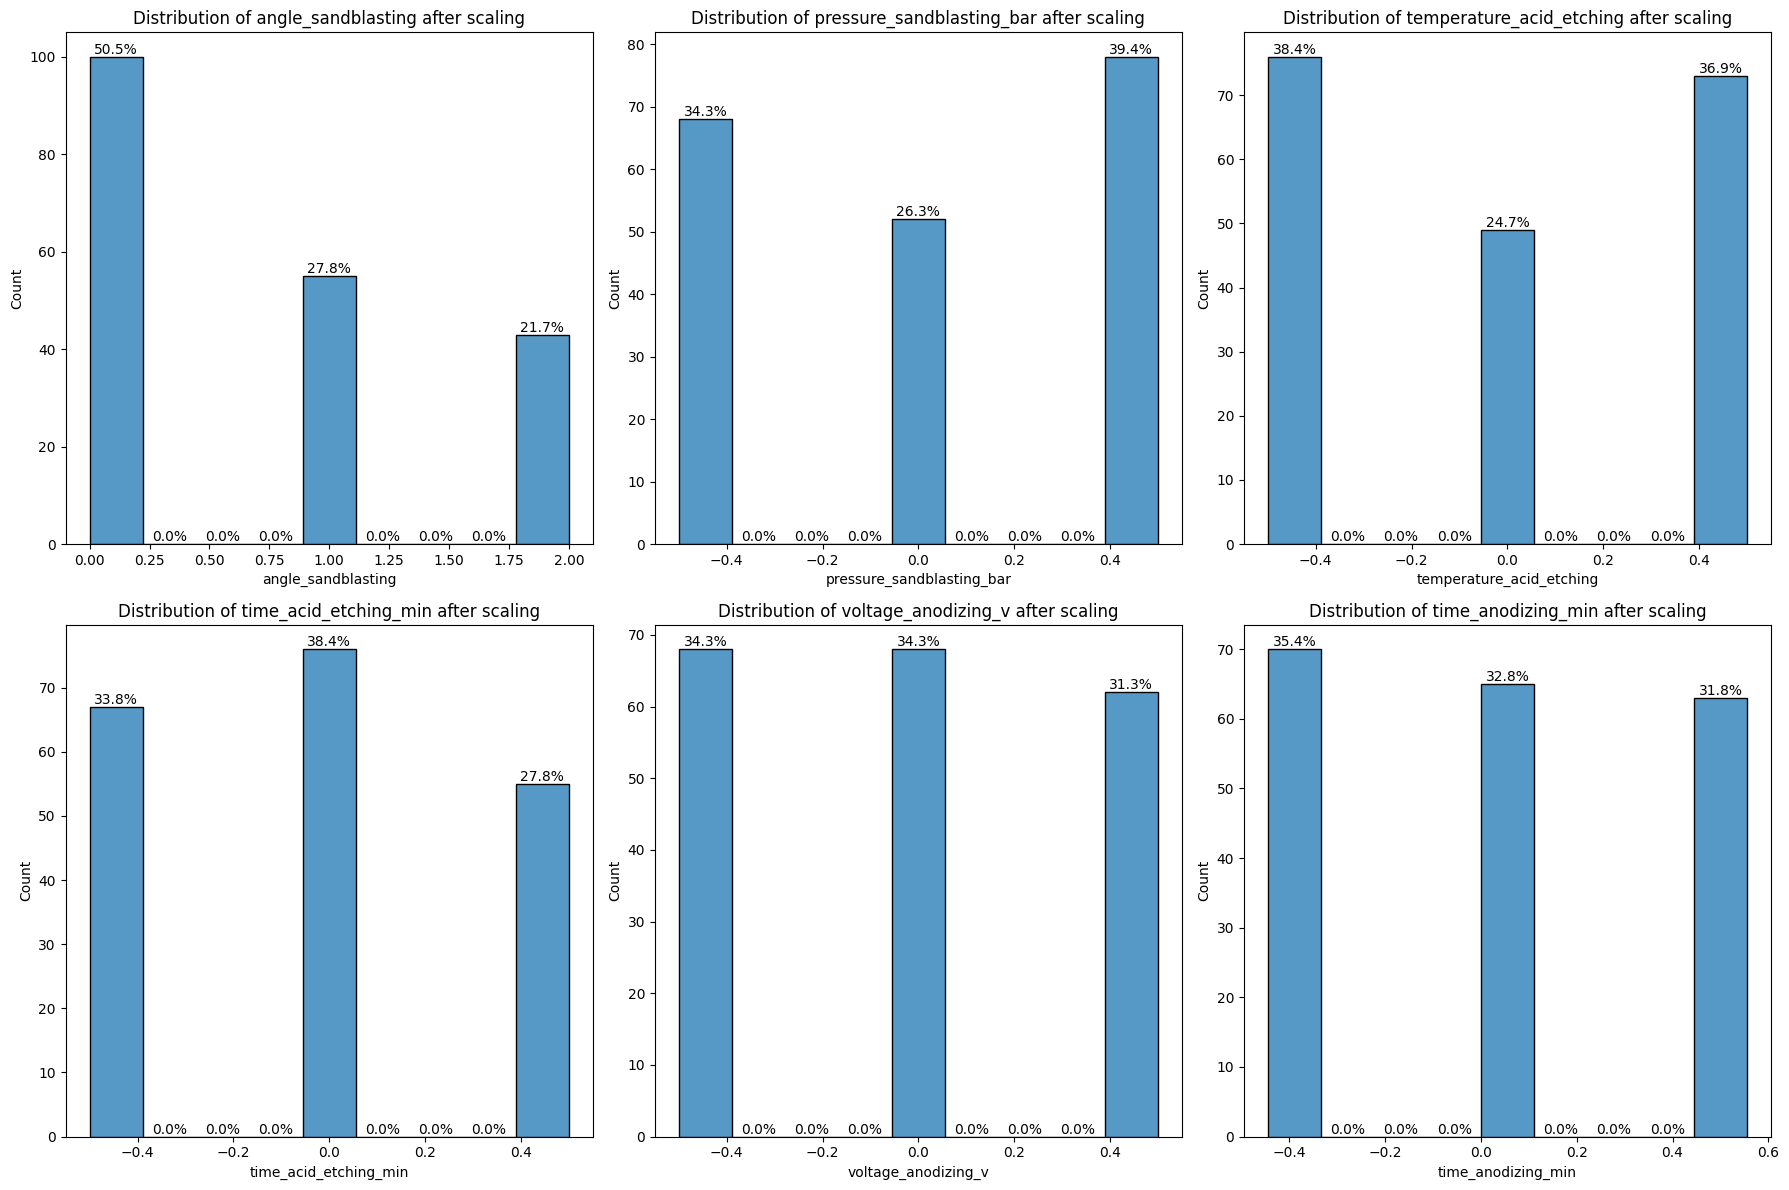

Training set size for Surface Roughness (Sa): (158, 6)
Testing set size for Surface Roughness (Sa): (40, 6)
Training set size for Cell Viability (CV): (158,)
Testing set size for Cell Viability (CV): (40,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Convert appropriate columns to numeric, forcing errors to NaN
cols_to_convert = [
    'angle_sandblasting', 
    'pressure_sandblasting_bar', 
    'temperature_acid_etching',
    'time_acid_etching_min',
    'voltage_anodizing_v', 
    'time_anodizing_min', 
    'sa_surface_roughness_micrometer', 
    'cell_viability_percent'
]

data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Advanced Imputation using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify data after imputation
print("Data after imputing missing values:\n", data_imputed.info())

# Ensure that the dataset is not empty after imputation
if data_imputed.empty:
    raise ValueError("Dataset is empty after imputing missing values.")

# Filter data according to the given validation ranges for Surface Roughness (Sa)
valid_data = data_imputed[
    (data_imputed['sa_surface_roughness_micrometer'] > 1.5) & 
    (data_imputed['sa_surface_roughness_micrometer'] < 2.5)
]

# Set "Cell Viability (%)" to 0 where Sa is outside the valid range
data_imputed.loc[~data_imputed.index.isin(valid_data.index), 'cell_viability_percent'] = 0

# Separate features and target variables
feature_columns = [
    'angle_sandblasting', 
    'pressure_sandblasting_bar', 
    'temperature_acid_etching', 
    'time_acid_etching_min', 
    'voltage_anodizing_v', 
    'time_anodizing_min'
]
target_column_sa = 'sa_surface_roughness_micrometer'
target_column_cv = 'cell_viability_percent'

X = data_imputed[feature_columns]
y_sa = data_imputed[target_column_sa]
y_cv = data_imputed[target_column_cv]

# Visualize distributions before scaling (Using Histograms with Percentage Labels)
plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_columns):
    plt.subplot(2, 3, i+1)
    ax = sns.histplot(X[column], kde=False, edgecolor='black')
    
    # Add percentage labels
    total = len(X[column])
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')
    
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Normalize or standardize features using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Visualize distributions after scaling (Using Histograms with Percentage Labels)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

# Update for handling a variable number of plots
num_features = len(feature_columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes = axes.flatten()  # Flatten axes array to easily iterate over it

for i, column in enumerate(X_scaled_df.columns):
    ax = sns.histplot(X_scaled_df[column], kde=False, ax=axes[i], edgecolor='black')
    
    # Add percentage labels
    total = len(X_scaled_df[column])
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

    axes[i].set_title(f'Distribution of {column} after scaling')

plt.tight_layout()
plt.show()

# Split the data into training and testing sets for both Surface Roughness (Sa) and Cell Viability (CV)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data_imputed[[target_column_sa, target_column_cv]], test_size=0.2, random_state=42)

# Separate targets for training and testing sets
y_sa_train = y_train[target_column_sa]
y_sa_test = y_test[target_column_sa]
y_cv_train = y_train[target_column_cv]
y_cv_test = y_test[target_column_cv]

print("Training set size for Surface Roughness (Sa):", X_train.shape)
print("Testing set size for Surface Roughness (Sa):", X_test.shape)
print("Training set size for Cell Viability (CV):", y_cv_train.shape)
print("Testing set size for Cell Viability (CV):", y_cv_test.shape)

# Check for any inconsistencies in the data split
if X_train.shape[0] != y_sa_train.shape[0] or X_train.shape[0] != y_cv_train.shape[0]:
    raise ValueError("Mismatch in the number of training samples between features and targets.")
if X_test.shape[0] != y_sa_test.shape[0] or X_test.shape[0] != y_cv_test.shape[0]:
    raise ValueError("Mismatch in the number of testing samples between features and targets.")


### 4. Feature Engineering
- Creating new features from the existing ones to improve the performance of machine learning models. This can include interaction terms, polynomial features, and other derived metrics that may capture additional information

Number of components after PCA: 6
Number of features selected for Sa after RFE: 6
Number of features selected for CV after RFE: 6


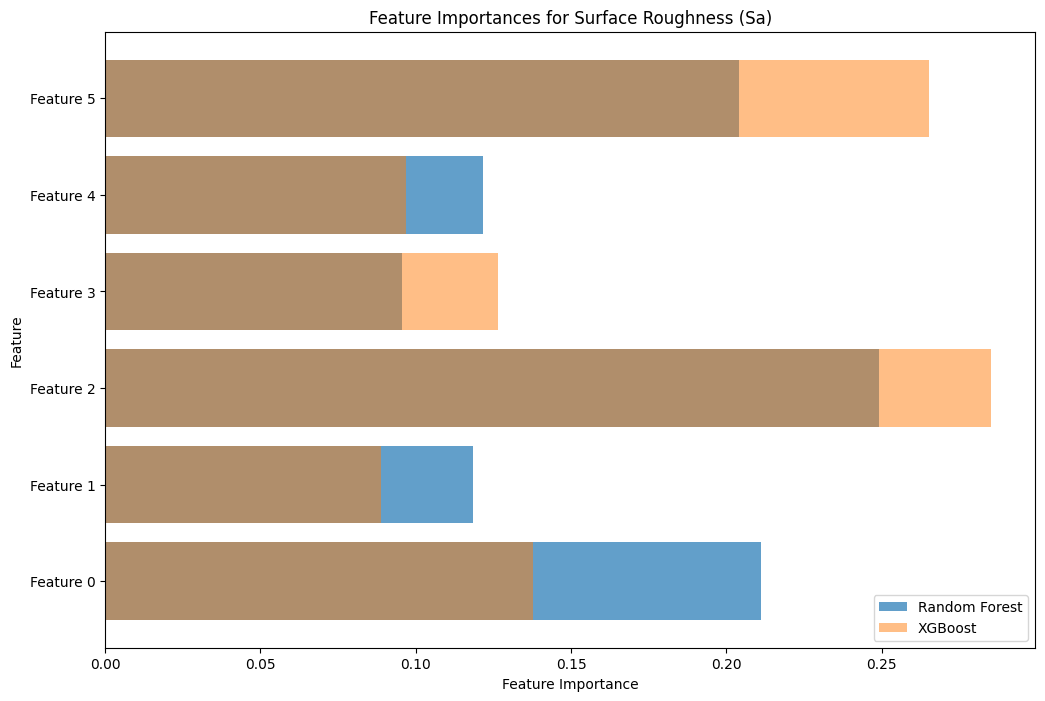

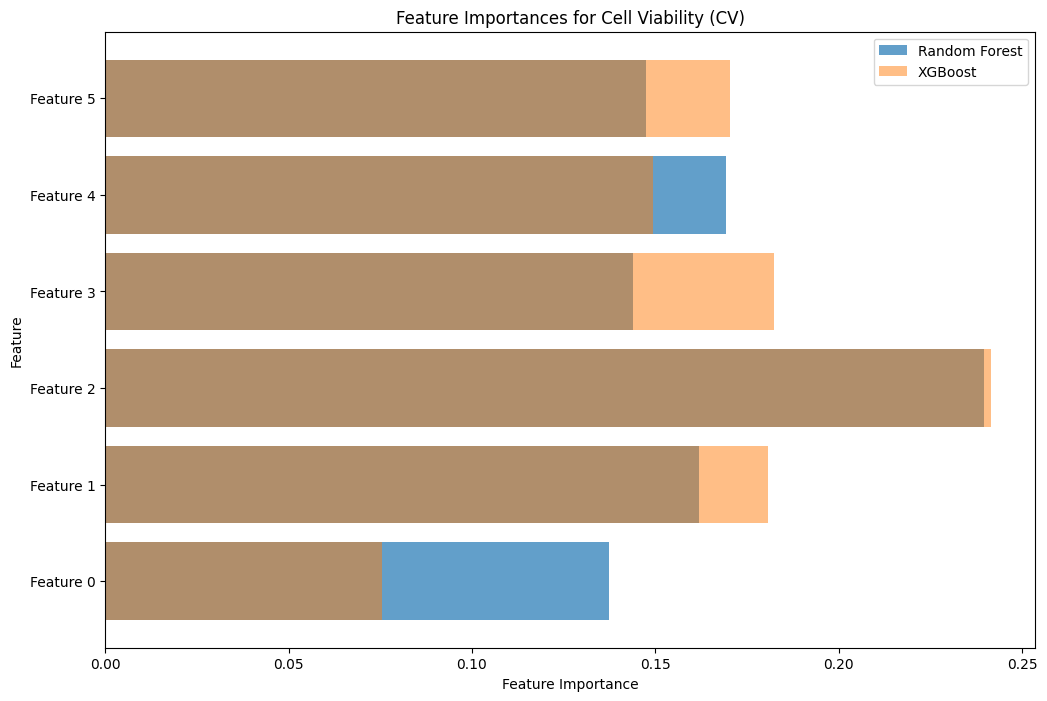

Training set size after feature selection for Sa: (158, 6)
Testing set size after feature selection for Sa: (40, 6)
Training set size after feature selection for CV: (158, 6)
Testing set size after feature selection for CV: (40, 6)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Convert appropriate columns to numeric, forcing errors to NaN
cols_to_convert = [
    'angle_sandblasting', 
    'pressure_sandblasting_bar', 
    'temperature_acid_etching',
    'time_acid_etching_min',
    'voltage_anodizing_v', 
    'time_anodizing_min', 
    'sa_surface_roughness_micrometer', 
    'cell_viability_percent'
]

data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Use KNN Imputer to handle missing values
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Define feature and target columns
feature_columns = [
    'angle_sandblasting', 
    'pressure_sandblasting_bar', 
    'temperature_acid_etching', 
    'time_acid_etching_min', 
    'voltage_anodizing_v', 
    'time_anodizing_min'
]
target_column_sa = 'sa_surface_roughness_micrometer'
target_column_cv = 'cell_viability_percent'

X = data_imputed[feature_columns]
y_sa = data_imputed[target_column_sa]
y_cv = data_imputed[target_column_cv]

# Robust scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (use consistent data splitting)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data_imputed[[target_column_sa, target_column_cv]], test_size=0.2, random_state=42)

# Separate targets for training and testing sets
y_sa_train = y_train[target_column_sa]
y_sa_test = y_test[target_column_sa]
y_cv_train = y_train[target_column_cv]
y_cv_test = y_test[target_column_cv]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Number of components after PCA: {X_train_pca.shape[1]}")

# Use RFE with Lasso as a model to select top features
model = Lasso(alpha=0.01, max_iter=10000)

# RFE for Sa
rfe_sa = RFE(model, n_features_to_select=10)
X_train_sa_rfe = rfe_sa.fit_transform(X_train_pca, y_sa_train)
X_test_sa_rfe = rfe_sa.transform(X_test_pca)

# RFE for CV
rfe_cv = RFE(model, n_features_to_select=10)
X_train_cv_rfe = rfe_cv.fit_transform(X_train_pca, y_cv_train)
X_test_cv_rfe = rfe_cv.transform(X_test_pca)

print(f"Number of features selected for Sa after RFE: {X_train_sa_rfe.shape[1]}")
print(f"Number of features selected for CV after RFE: {X_train_cv_rfe.shape[1]}")

# Ensure consistency in data splits
if X_train.shape[0] != y_sa_train.shape[0] or X_train.shape[0] != y_cv_train.shape[0]:
    raise ValueError("Mismatch in the number of training samples between features and targets.")
if X_test.shape[0] != y_sa_test.shape[0] or X_test.shape[0] != y_cv_test.shape[0]:
    raise ValueError("Mismatch in the number of testing samples between features and targets.")

# Plotting Feature Importances for Sa and CV using RandomForest and XGBoost after PCA and RFE

# Random Forest for Sa
rf_sa = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sa.fit(X_train_sa_rfe, y_sa_train)
importances_rf_sa = rf_sa.feature_importances_

# Random Forest for CV
rf_cv = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cv.fit(X_train_cv_rfe, y_cv_train)
importances_rf_cv = rf_cv.feature_importances_

# XGBoost for Sa
xgb_sa = XGBRegressor(n_estimators=100, random_state=42)
xgb_sa.fit(X_train_sa_rfe, y_sa_train)
importances_xgb_sa = xgb_sa.feature_importances_

# XGBoost for CV
xgb_cv = XGBRegressor(n_estimators=100, random_state=42)
xgb_cv.fit(X_train_cv_rfe, y_cv_train)
importances_xgb_cv = xgb_cv.feature_importances_

# Plotting Feature Importances for Sa
plt.figure(figsize=(12, 8))
plt.barh([f'Feature {i}' for i in range(len(importances_rf_sa))], importances_rf_sa, label='Random Forest', alpha=0.7)
plt.barh([f'Feature {i}' for i in range(len(importances_xgb_sa))], importances_xgb_sa, label='XGBoost', alpha=0.5)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Surface Roughness (Sa)')
plt.legend()
plt.show()

# Plotting Feature Importances for CV
plt.figure(figsize=(12, 8))
plt.barh([f'Feature {i}' for i in range(len(importances_rf_cv))], importances_rf_cv, label='Random Forest', alpha=0.7)
plt.barh([f'Feature {i}' for i in range(len(importances_xgb_cv))], importances_xgb_cv, label='XGBoost', alpha=0.5)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Cell Viability (CV)')
plt.legend()
plt.show()

print(f"Training set size after feature selection for Sa: {X_train_sa_rfe.shape}")
print(f"Testing set size after feature selection for Sa: {X_test_sa_rfe.shape}")
print(f"Training set size after feature selection for CV: {X_train_cv_rfe.shape}")
print(f"Testing set size after feature selection for CV: {X_test_cv_rfe.shape}")


### 5. Model Training
- To identify the best model for predicting optimal sandblasting conditions for dental implants, we will experiment with various machine learning models. This includes Linear Regression, Random Forest, Gradient Boosting, and Neural Networks .

Training RandomForest...
RandomForest - MAE (Sa): 0.5444, MAE (CV): 7.3011
RandomForest - R² (Sa): 0.0530, R² (CV): 0.0402
RandomForest - MAPE (Sa): 43.9720, MAPE (CV): 9.4328
RandomForest - SMAPE (Sa): 31.7743, SMAPE (CV): 9.3730
Training BaggingRF...
BaggingRF - MAE (Sa): 0.5757, MAE (CV): 7.2529
BaggingRF - R² (Sa): -0.0090, R² (CV): 0.0681
BaggingRF - MAPE (Sa): 46.9019, MAPE (CV): 9.3549
BaggingRF - SMAPE (Sa): 33.3020, SMAPE (CV): 9.3154

Model Performance:
               MAE (Sa)  MSE (Sa)   R² (Sa)  MAPE (Sa)  SMAPE (Sa)  MAE (CV)  \
RandomForest  0.544390  0.481778  0.053035  43.972022   31.774342  7.301115   
BaggingRF     0.575685  0.513326 -0.008975  46.901935   33.302010  7.252942   

               MSE (CV)   R² (CV)  MAPE (CV)  SMAPE (CV)  
RandomForest  83.407601  0.040161   9.432766    9.373034  
BaggingRF     80.982205  0.068072   9.354851    9.315362  


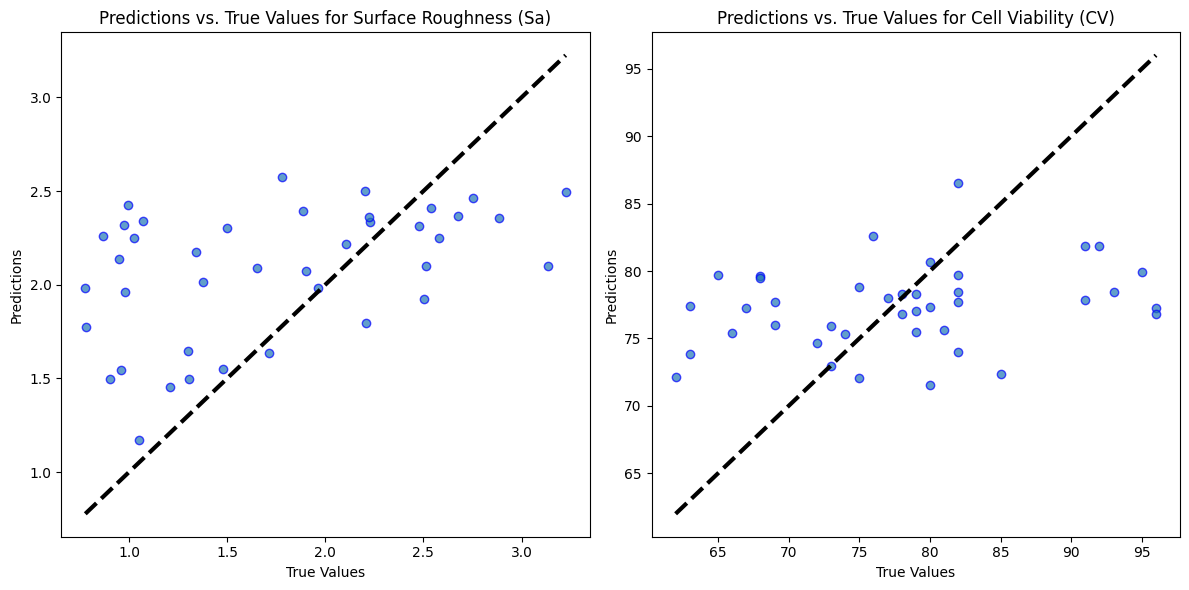

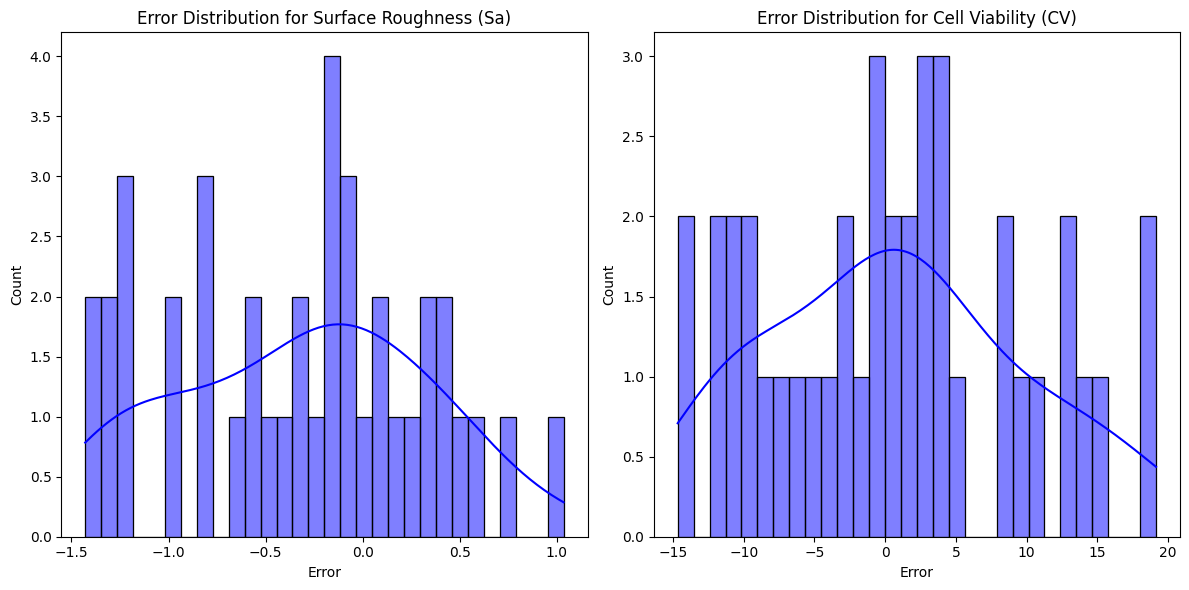

In [7]:
# Import necessary libraries and models
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define models to train
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "BaggingRF": BaggingRegressor(estimator=RandomForestRegressor(random_state=42), random_state=42)
}

# Initialize a dictionary to store model performance
model_performance = {}

# Define custom evaluation metrics
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + 1e-10))

def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

# Train each model and evaluate
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train and predict for Surface Roughness (Sa)
    model.fit(X_train_sa_rfe, y_sa_train)
    y_sa_pred = model.predict(X_test_sa_rfe)
    mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
    mse_sa = mean_squared_error(y_sa_test, y_sa_pred)
    r2_sa = r2_score(y_sa_test, y_sa_pred)
    mape_sa = mape(y_sa_test, y_sa_pred)
    smape_sa = smape(y_sa_test, y_sa_pred)

    # Train and predict for Cell Viability (CV)
    model.fit(X_train_cv_rfe, y_cv_train)
    y_cv_pred = model.predict(X_test_cv_rfe)
    mae_cv = mean_absolute_error(y_cv_test, y_cv_pred)
    mse_cv = mean_squared_error(y_cv_test, y_cv_pred)
    r2_cv = r2_score(y_cv_test, y_cv_pred)
    mape_cv = mape(y_cv_test, y_cv_pred)
    smape_cv = smape(y_cv_test, y_cv_pred)

    # Store performance metrics
    model_performance[model_name] = {
        "MAE (Sa)": mae_sa,
        "MSE (Sa)": mse_sa,
        "R² (Sa)": r2_sa,
        "MAPE (Sa)": mape_sa,
        "SMAPE (Sa)": smape_sa,
        "MAE (CV)": mae_cv,
        "MSE (CV)": mse_cv,
        "R² (CV)": r2_cv,
        "MAPE (CV)": mape_cv,
        "SMAPE (CV)": smape_cv,
    }

    print(f"{model_name} - MAE (Sa): {mae_sa:.4f}, MAE (CV): {mae_cv:.4f}")
    print(f"{model_name} - R² (Sa): {r2_sa:.4f}, R² (CV): {r2_cv:.4f}")
    print(f"{model_name} - MAPE (Sa): {mape_sa:.4f}, MAPE (CV): {mape_cv:.4f}")
    print(f"{model_name} - SMAPE (Sa): {smape_sa:.4f}, SMAPE (CV): {smape_cv:.4f}")

# Convert performance metrics to DataFrame for easier analysis
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance:\n", performance_df)

# Visualizations for model evaluation
# Predictions vs. True Values for Sa and CV
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_sa_test, y_sa_pred, alpha=0.7, edgecolors='b')
plt.plot([y_sa_test.min(), y_sa_test.max()], [y_sa_test.min(), y_sa_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Surface Roughness (Sa)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1, 2, 2)
plt.scatter(y_cv_test, y_cv_pred, alpha=0.7, edgecolors='b')
plt.plot([y_cv_test.min(), y_cv_test.max()], [y_cv_test.min(), y_cv_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Cell Viability (CV)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.tight_layout()
plt.show()

# Error Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_sa_test - y_sa_pred, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Surface Roughness (Sa)")
plt.xlabel("Error")

plt.subplot(1, 2, 2)
sns.histplot(y_cv_test - y_cv_pred, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Cell Viability (CV)")
plt.xlabel("Error")

plt.tight_layout()
plt.show()


### 6.Hyperparameter Tuning : 
- Hyperparameter tuning aims to find the best set of hyperparameters for a machine learning model to optimize its performance. Here’s how to perform hyperparameter tuning for the Random Forest and Gradient Boosting models.

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters for RandomForest (Sa): {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\Farshid Hesami\anaconda3\envs\mlProject\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best hyperparameters for BaggingRF (CV): {'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.7, 'base_estimator__max_depth': None}
Tuned RandomForest - MAE (Sa): 0.5646, R² (Sa): 0.0182, MAPE (Sa): 45.8151, SMAPE (Sa): 32.6155
Tuned BaggingRF - MAE (CV): 7.2432, R² (CV): 0.0361, MAPE (CV): 9.3775, SMAPE (CV): 9.3093


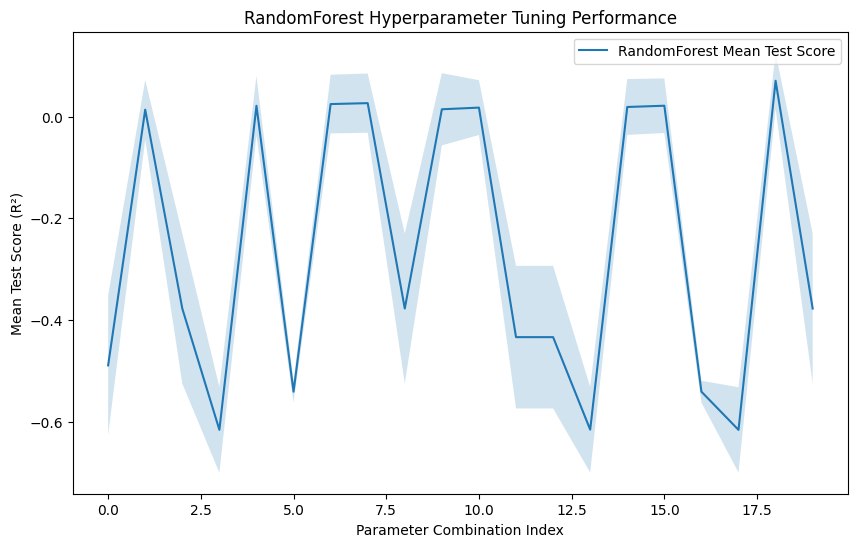

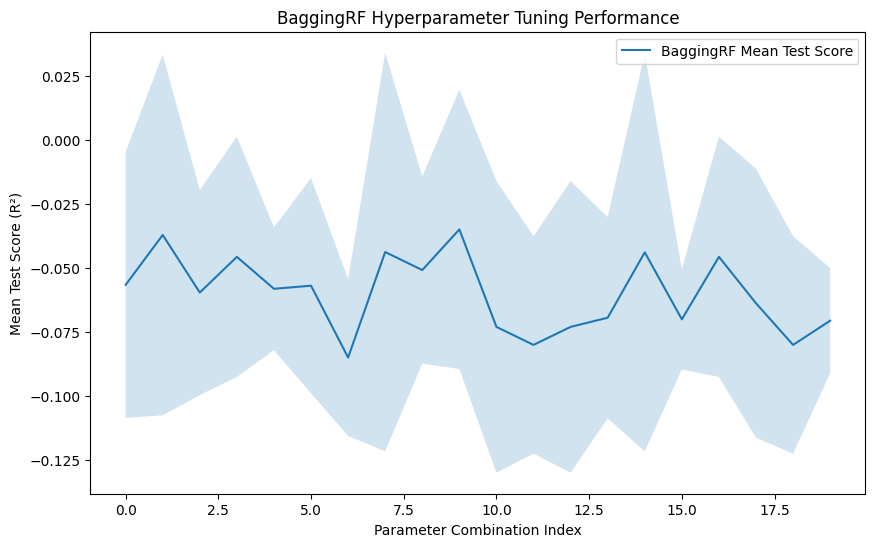

In [8]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom evaluation metrics
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-10))

def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

# Define parameter grids for hyperparameter tuning

# For RandomForest (Surface Roughness Sa)
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# For BaggingRF (Cell Viability CV)
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'base_estimator__max_depth': [None, 10, 20, 30]
}

# Hyperparameter tuning for RandomForest (Sa)
rf_random_search_sa = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random_search_sa.fit(X_train_sa_rfe, y_sa_train)

# Best parameters and model for Sa
best_rf_params_sa = rf_random_search_sa.best_params_
best_rf_model_sa = rf_random_search_sa.best_estimator_
print("Best hyperparameters for RandomForest (Sa):", best_rf_params_sa)

# Hyperparameter tuning for BaggingRF (CV)
bagging_random_search_cv = RandomizedSearchCV(
    estimator=BaggingRegressor(base_estimator=RandomForestRegressor(random_state=42), random_state=42),
    param_distributions=param_grid_bagging,
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

bagging_random_search_cv.fit(X_train_cv_rfe, y_cv_train)

# Best parameters and model for CV
best_bagging_params_cv = bagging_random_search_cv.best_params_
best_bagging_model_cv = bagging_random_search_cv.best_estimator_
print("Best hyperparameters for BaggingRF (CV):", best_bagging_params_cv)

# Evaluate the tuned models on the test set

# Surface Roughness (Sa)
y_sa_pred_tuned = best_rf_model_sa.predict(X_test_sa_rfe)
mae_sa_tuned = mean_absolute_error(y_sa_test, y_sa_pred_tuned)
mse_sa_tuned = mean_squared_error(y_sa_test, y_sa_pred_tuned)
r2_sa_tuned = r2_score(y_sa_test, y_sa_pred_tuned)
mape_sa_tuned = mape(y_sa_test, y_sa_pred_tuned)
smape_sa_tuned = smape(y_sa_test, y_sa_pred_tuned)

print(f"Tuned RandomForest - MAE (Sa): {mae_sa_tuned:.4f}, R² (Sa): {r2_sa_tuned:.4f}, MAPE (Sa): {mape_sa_tuned:.4f}, SMAPE (Sa): {smape_sa_tuned:.4f}")

# Cell Viability (CV)
y_cv_pred_tuned = best_bagging_model_cv.predict(X_test_cv_rfe)
mae_cv_tuned = mean_absolute_error(y_cv_test, y_cv_pred_tuned)
mse_cv_tuned = mean_squared_error(y_cv_test, y_cv_pred_tuned)
r2_cv_tuned = r2_score(y_cv_test, y_cv_pred_tuned)
mape_cv_tuned = mape(y_cv_test, y_cv_pred_tuned)
smape_cv_tuned = smape(y_cv_test, y_cv_pred_tuned)

print(f"Tuned BaggingRF - MAE (CV): {mae_cv_tuned:.4f}, R² (CV): {r2_cv_tuned:.4f}, MAPE (CV): {mape_cv_tuned:.4f}, SMAPE (CV): {smape_cv_tuned:.4f}")

# Visualizations for Hyperparameter Tuning Results

# RandomForest Hyperparameter Tuning Results
rf_results = rf_random_search_sa.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(rf_results['mean_test_score'], label='RandomForest Mean Test Score')
plt.fill_between(
    range(len(rf_results['mean_test_score'])),
    rf_results['mean_test_score'] - rf_results['std_test_score'],
    rf_results['mean_test_score'] + rf_results['std_test_score'],
    alpha=0.2
)
plt.title('RandomForest Hyperparameter Tuning Performance')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (R²)')
plt.legend()
plt.show()

# BaggingRF Hyperparameter Tuning Results
bagging_results = bagging_random_search_cv.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(bagging_results['mean_test_score'], label='BaggingRF Mean Test Score')
plt.fill_between(
    range(len(bagging_results['mean_test_score'])),
    bagging_results['mean_test_score'] - bagging_results['std_test_score'],
    bagging_results['mean_test_score'] + bagging_results['std_test_score'],
    alpha=0.2
)
plt.title('BaggingRF Hyperparameter Tuning Performance')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (R²)')
plt.legend()
plt.show()


### 7. Model Evaluation :
- To evaluate the best model (Gradient Boosting in this case) for predicting Surface Roughness (Sa) and Cell Viability.

Tuned RandomForest - Test MAE (Sa): 0.5646
Tuned RandomForest - Test MSE (Sa): 0.4995
Tuned RandomForest - Test R2 (Sa): 0.0182
Tuned RandomForest - Test MAPE (Sa): 45.8151
Tuned RandomForest - Test SMAPE (Sa): 32.6155
Tuned BaggingRF - Test MAE (CV): 7.2432
Tuned BaggingRF - Test MSE (CV): 83.7642
Tuned BaggingRF - Test R2 (CV): 0.0361
Tuned BaggingRF - Test MAPE (CV): 9.3775
Tuned BaggingRF - Test SMAPE (CV): 9.3093


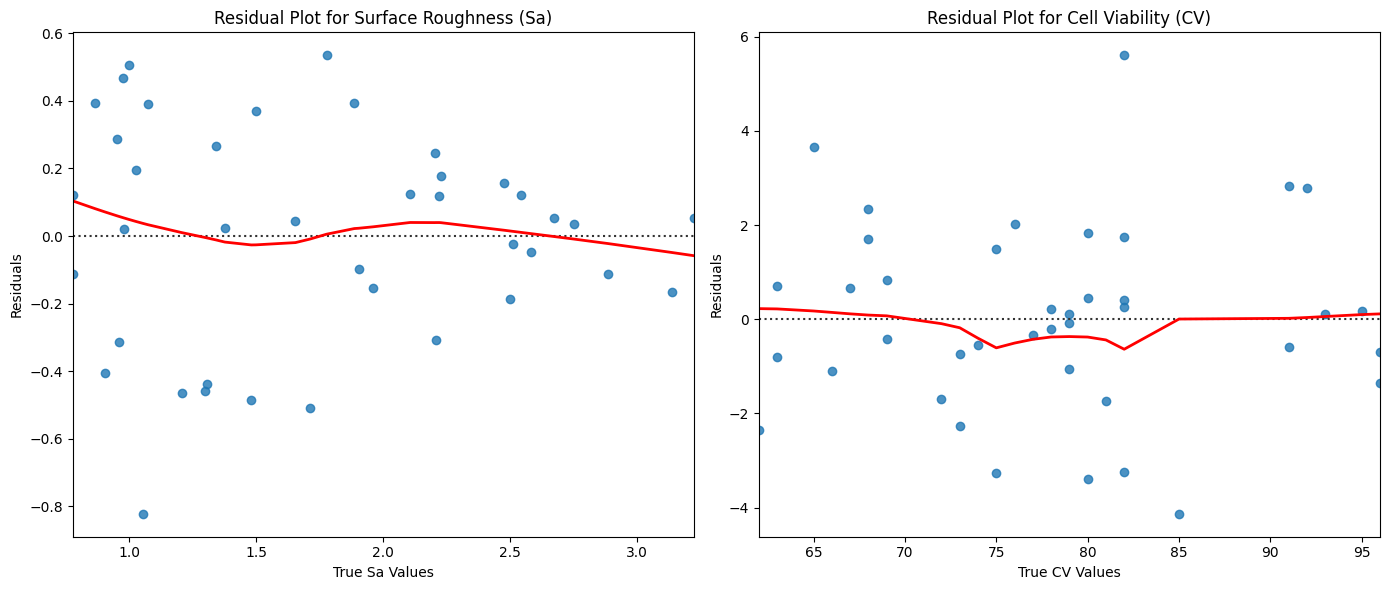

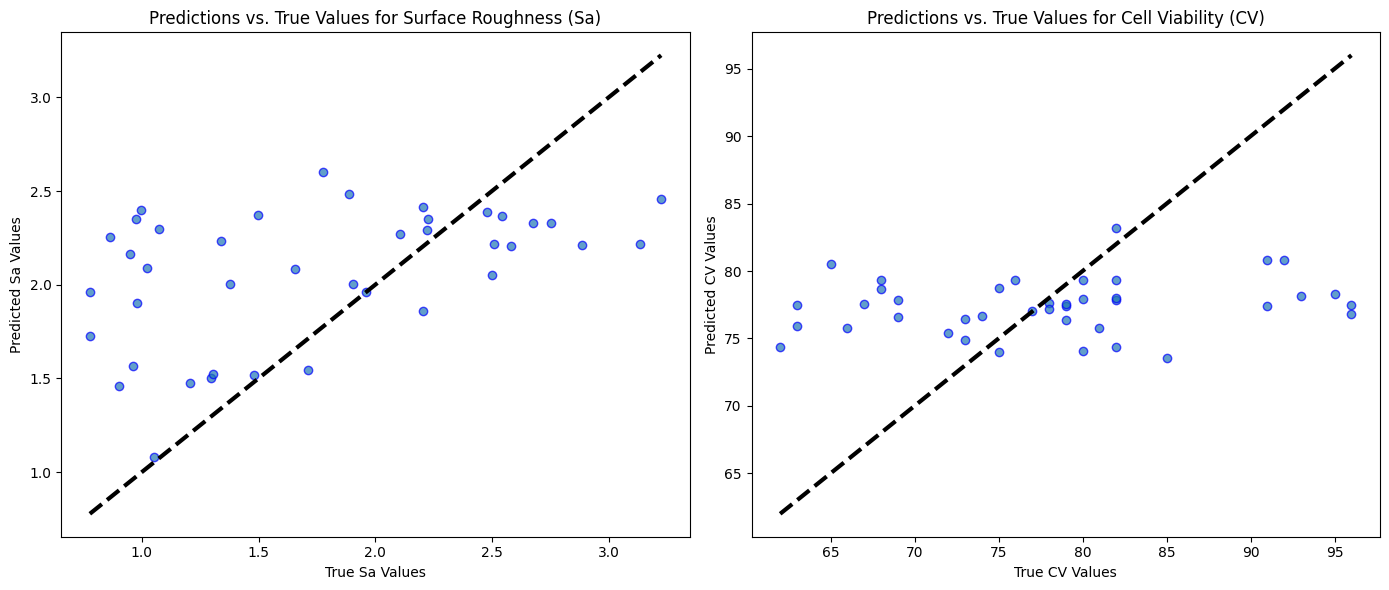

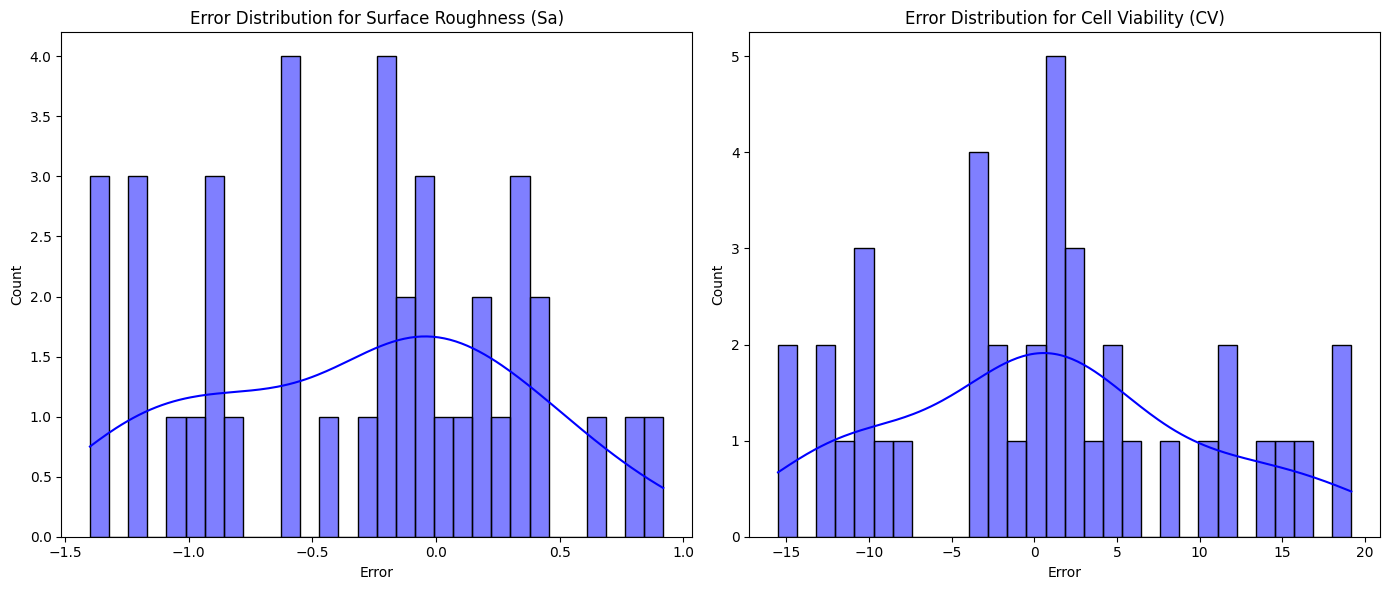

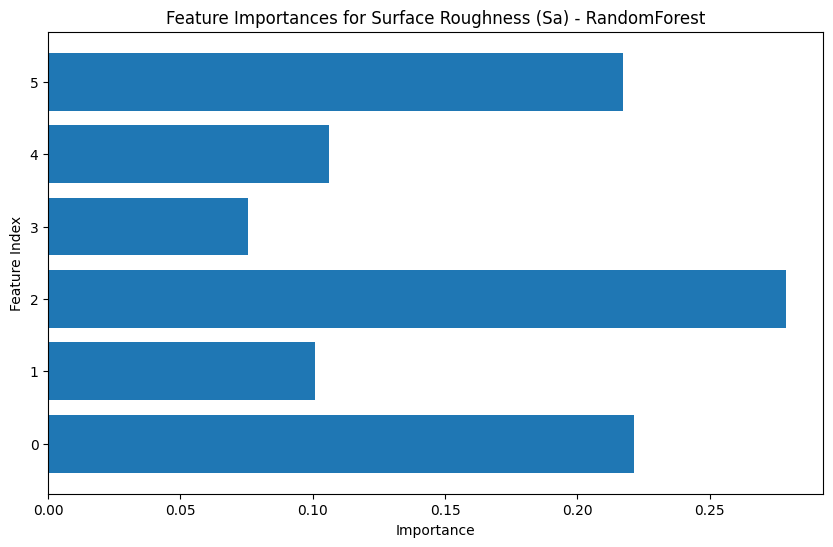

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming that the best models from hyperparameter tuning are available
# best_rf_model_sa and best_bagging_model_cv are obtained from Hyperparameter Tuning (Step 6)

# Define custom evaluation metrics (if not defined already)
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-10))

def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

# Evaluate the tuned models on the test set

# Surface Roughness (Sa)
y_sa_pred_tuned = best_rf_model_sa.predict(X_test_sa_rfe)
mae_sa_tuned = mean_absolute_error(y_sa_test, y_sa_pred_tuned)
mse_sa_tuned = mean_squared_error(y_sa_test, y_sa_pred_tuned)
r2_sa_tuned = r2_score(y_sa_test, y_sa_pred_tuned)
mape_sa_tuned = mape(y_sa_test, y_sa_pred_tuned)
smape_sa_tuned = smape(y_sa_test, y_sa_pred_tuned)

print(f"Tuned RandomForest - Test MAE (Sa): {mae_sa_tuned:.4f}")
print(f"Tuned RandomForest - Test MSE (Sa): {mse_sa_tuned:.4f}")
print(f"Tuned RandomForest - Test R2 (Sa): {r2_sa_tuned:.4f}")
print(f"Tuned RandomForest - Test MAPE (Sa): {mape_sa_tuned:.4f}")
print(f"Tuned RandomForest - Test SMAPE (Sa): {smape_sa_tuned:.4f}")

# Cell Viability (CV)
y_cv_pred_tuned = best_bagging_model_cv.predict(X_test_cv_rfe)
mae_cv_tuned = mean_absolute_error(y_cv_test, y_cv_pred_tuned)
mse_cv_tuned = mean_squared_error(y_cv_test, y_cv_pred_tuned)
r2_cv_tuned = r2_score(y_cv_test, y_cv_pred_tuned)
mape_cv_tuned = mape(y_cv_test, y_cv_pred_tuned)
smape_cv_tuned = smape(y_cv_test, y_cv_pred_tuned)

print(f"Tuned BaggingRF - Test MAE (CV): {mae_cv_tuned:.4f}")
print(f"Tuned BaggingRF - Test MSE (CV): {mse_cv_tuned:.4f}")
print(f"Tuned BaggingRF - Test R2 (CV): {r2_cv_tuned:.4f}")
print(f"Tuned BaggingRF - Test MAPE (CV): {mape_cv_tuned:.4f}")
print(f"Tuned BaggingRF - Test SMAPE (CV): {smape_cv_tuned:.4f}")

# Visualizations for Model Evaluation

# 1. Residual Plot for Sa and CV
plt.figure(figsize=(14, 6))

# Residual plot for Sa
plt.subplot(1, 2, 1)
sns.residplot(x=y_sa_test, y=y_sa_pred_tuned, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residual Plot for Surface Roughness (Sa)')
plt.xlabel('True Sa Values')
plt.ylabel('Residuals')

# Residual plot for CV
plt.subplot(1, 2, 2)
sns.residplot(x=y_cv_test, y=y_cv_pred_tuned, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residual Plot for Cell Viability (CV)')
plt.xlabel('True CV Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# 2. Predictions vs. True Values Plot for Sa and CV
plt.figure(figsize=(14, 6))

# Plot for Sa
plt.subplot(1, 2, 1)
plt.scatter(y_sa_test, y_sa_pred_tuned, alpha=0.7, edgecolors='b')
plt.plot([y_sa_test.min(), y_sa_test.max()], [y_sa_test.min(), y_sa_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Surface Roughness (Sa)")
plt.xlabel("True Sa Values")
plt.ylabel("Predicted Sa Values")

# Plot for CV
plt.subplot(1, 2, 2)
plt.scatter(y_cv_test, y_cv_pred_tuned, alpha=0.7, edgecolors='b')
plt.plot([y_cv_test.min(), y_cv_test.max()], [y_cv_test.min(), y_cv_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Cell Viability (CV)")
plt.xlabel("True CV Values")
plt.ylabel("Predicted CV Values")

plt.tight_layout()
plt.show()

# 3. Error Distribution for Sa and CV
plt.figure(figsize=(14, 6))

# Error distribution for Sa
plt.subplot(1, 2, 1)
sns.histplot(y_sa_test - y_sa_pred_tuned, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Surface Roughness (Sa)")
plt.xlabel("Error")

# Error distribution for CV
plt.subplot(1, 2, 2)
sns.histplot(y_cv_test - y_cv_pred_tuned, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Cell Viability (CV)")
plt.xlabel("Error")

plt.tight_layout()
plt.show()

# 4. Feature Importance Plot (if applicable)
# Only for models that provide feature importance (like RandomForest)
plt.figure(figsize=(10, 6))
plt.barh(range(len(best_rf_model_sa.feature_importances_)), best_rf_model_sa.feature_importances_, align='center')
plt.title('Feature Importances for Surface Roughness (Sa) - RandomForest')
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.show()


### 8. Predictions  :
- Surface Roughness and Cell Viability directly in the prediction function.

Predictions for Surface Roughness (Sa):
MAE: 0.5646, MSE: 0.4995, R²: 0.0182, MAPE: 45.8151, SMAPE: 32.6155

Predictions for Cell Viability (CV):
MAE: 7.2432, MSE: 83.7642, R²: 0.0361, MAPE: 9.3775, SMAPE: 9.3093

Prediction results saved to research\predictions


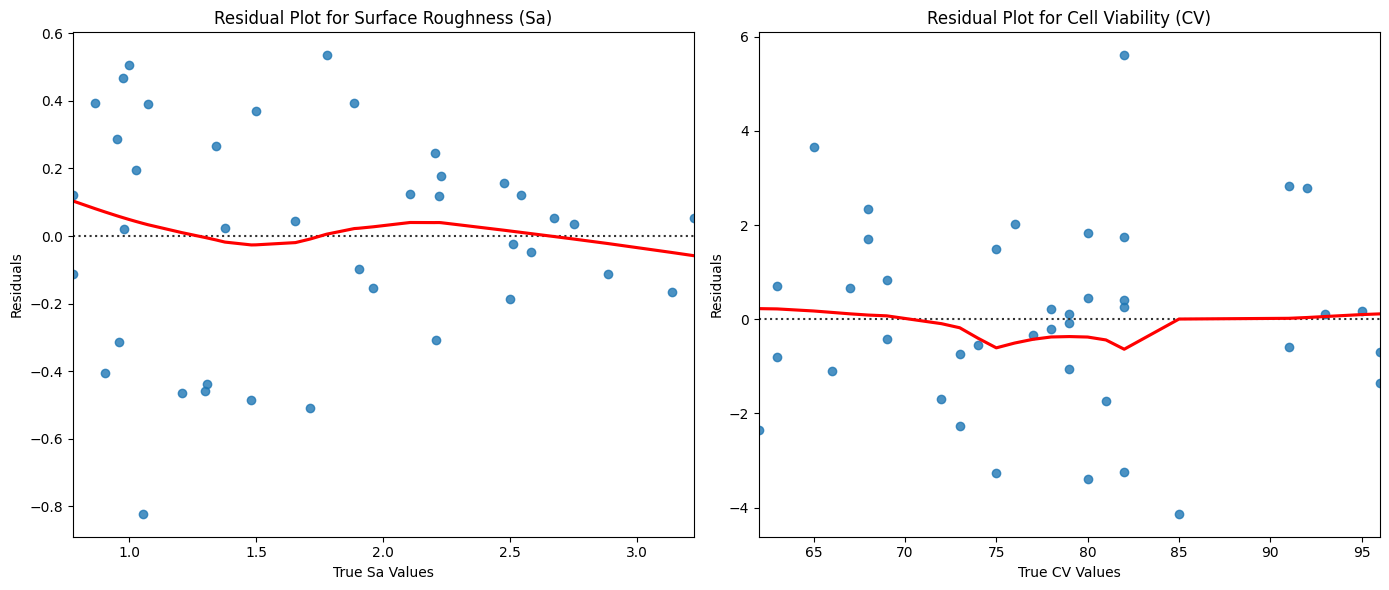

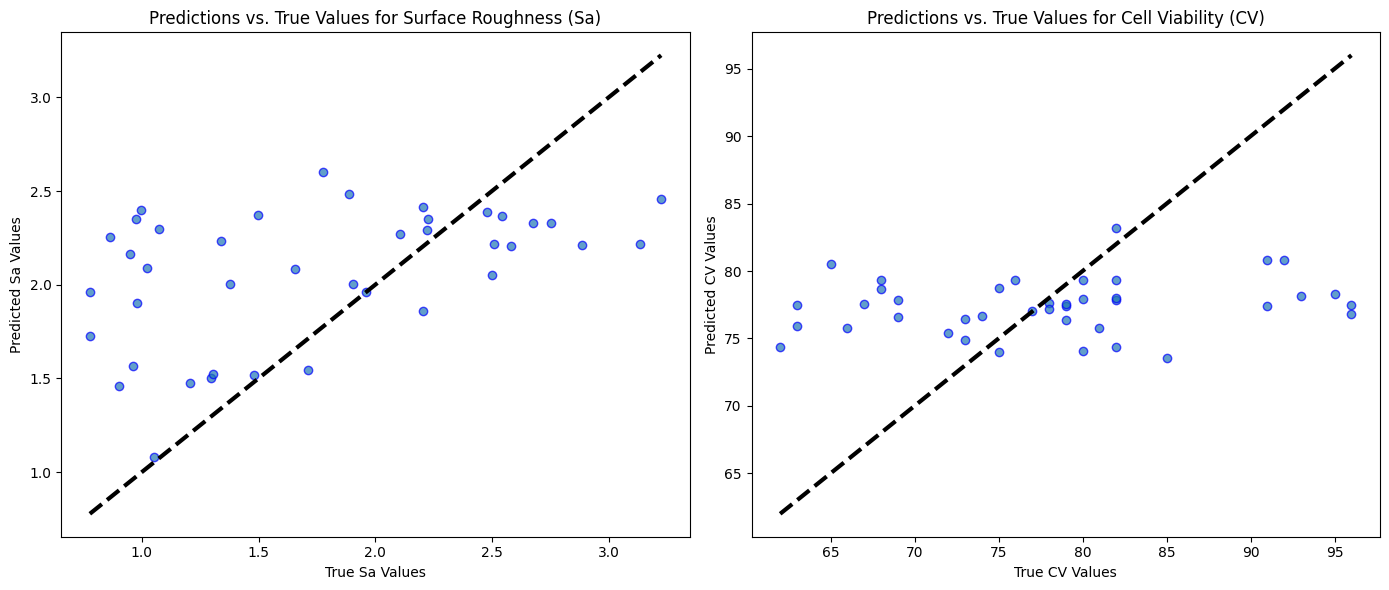

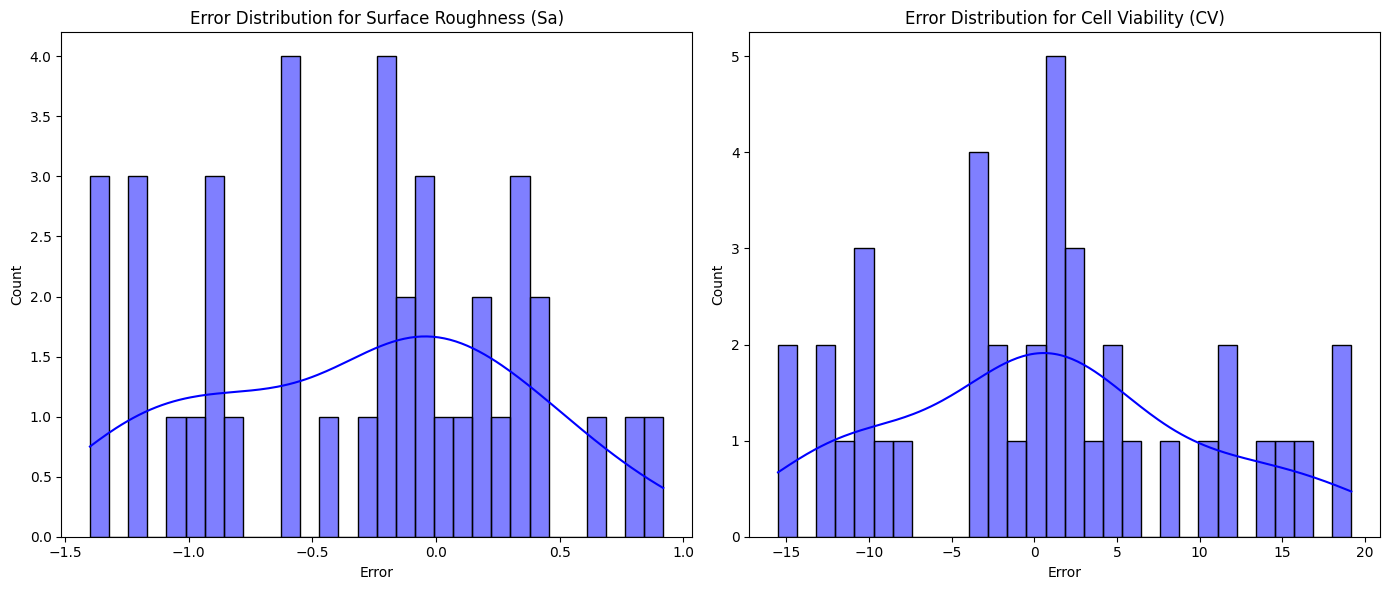

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom evaluation metrics
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-10))

def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

# Ensure the 'predictions' directory exists
predictions_dir = Path('research/predictions')
predictions_dir.mkdir(parents=True, exist_ok=True)

# Load the best models from the Hyperparameter Tuning (Step 6)
# Assuming `best_rf_model_sa` and `best_bagging_model_cv` were defined in Hyperparameter Tuning (Step 6)

# Generate predictions for Surface Roughness (Sa)
y_sa_pred = best_rf_model_sa.predict(X_test_sa_rfe)

# Generate predictions for Cell Viability (CV)
y_cv_pred = best_bagging_model_cv.predict(X_test_cv_rfe)

# Evaluate predictions
mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
mse_sa = mean_squared_error(y_sa_test, y_sa_pred)
r2_sa = r2_score(y_sa_test, y_sa_pred)
mape_sa = mape(y_sa_test, y_sa_pred)
smape_sa = smape(y_sa_test, y_sa_pred)

mae_cv = mean_absolute_error(y_cv_test, y_cv_pred)
mse_cv = mean_squared_error(y_cv_test, y_cv_pred)
r2_cv = r2_score(y_cv_test, y_cv_pred)
mape_cv = mape(y_cv_test, y_cv_pred)
smape_cv = smape(y_cv_test, y_cv_pred)

# Print evaluation metrics
print(f"Predictions for Surface Roughness (Sa):")
print(f"MAE: {mae_sa:.4f}, MSE: {mse_sa:.4f}, R²: {r2_sa:.4f}, MAPE: {mape_sa:.4f}, SMAPE: {smape_sa:.4f}")

print(f"\nPredictions for Cell Viability (CV):")
print(f"MAE: {mae_cv:.4f}, MSE: {mse_cv:.4f}, R²: {r2_cv:.4f}, MAPE: {mape_cv:.4f}, SMAPE: {smape_cv:.4f}")

# Save prediction results to CSV files
predictions_sa = pd.DataFrame({'True_Sa': y_sa_test, 'Predicted_Sa': y_sa_pred})
predictions_cv = pd.DataFrame({'True_CV': y_cv_test, 'Predicted_CV': y_cv_pred})

predictions_sa.to_csv(predictions_dir / 'predictions_sa.csv', index=False)
predictions_cv.to_csv(predictions_dir / 'predictions_cv.csv', index=False)

print(f"\nPrediction results saved to {predictions_dir}")

# Visualizations of the predictions

# Residual plots for Sa and CV
plt.figure(figsize=(14, 6))

# Residual plot for Sa
plt.subplot(1, 2, 1)
sns.residplot(x=y_sa_test, y=y_sa_pred, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot for Surface Roughness (Sa)')
plt.xlabel('True Sa Values')
plt.ylabel('Residuals')

# Residual plot for CV
plt.subplot(1, 2, 2)
sns.residplot(x=y_cv_test, y=y_cv_pred, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot for Cell Viability (CV)')
plt.xlabel('True CV Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Predictions vs. True Values plot
plt.figure(figsize=(14, 6))

# Predictions vs True Values for Sa
plt.subplot(1, 2, 1)
plt.scatter(y_sa_test, y_sa_pred, alpha=0.7, edgecolor='b')
plt.plot([y_sa_test.min(), y_sa_test.max()], [y_sa_test.min(), y_sa_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Surface Roughness (Sa)")
plt.xlabel("True Sa Values")
plt.ylabel("Predicted Sa Values")

# Predictions vs True Values for CV
plt.subplot(1, 2, 2)
plt.scatter(y_cv_test, y_cv_pred, alpha=0.7, edgecolor='b')
plt.plot([y_cv_test.min(), y_cv_test.max()], [y_cv_test.min(), y_cv_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Cell Viability (CV)")
plt.xlabel("True CV Values")
plt.ylabel("Predicted CV Values")

plt.tight_layout()
plt.show()

# Error Distribution plots
plt.figure(figsize=(14, 6))

# Error distribution for Sa
plt.subplot(1, 2, 1)
sns.histplot(y_sa_test - y_sa_pred, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Surface Roughness (Sa)")
plt.xlabel("Error")

# Error distribution for CV
plt.subplot(1, 2, 2)
sns.histplot(y_cv_test - y_cv_pred, kde=True, bins=30, color='blue')
plt.title("Error Distribution for Cell Viability (CV)")
plt.xlabel("Error")

plt.tight_layout()
plt.show()

